<a href="https://colab.research.google.com/github/gouthamgo/Build-with-llms/blob/simple-rag/rag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

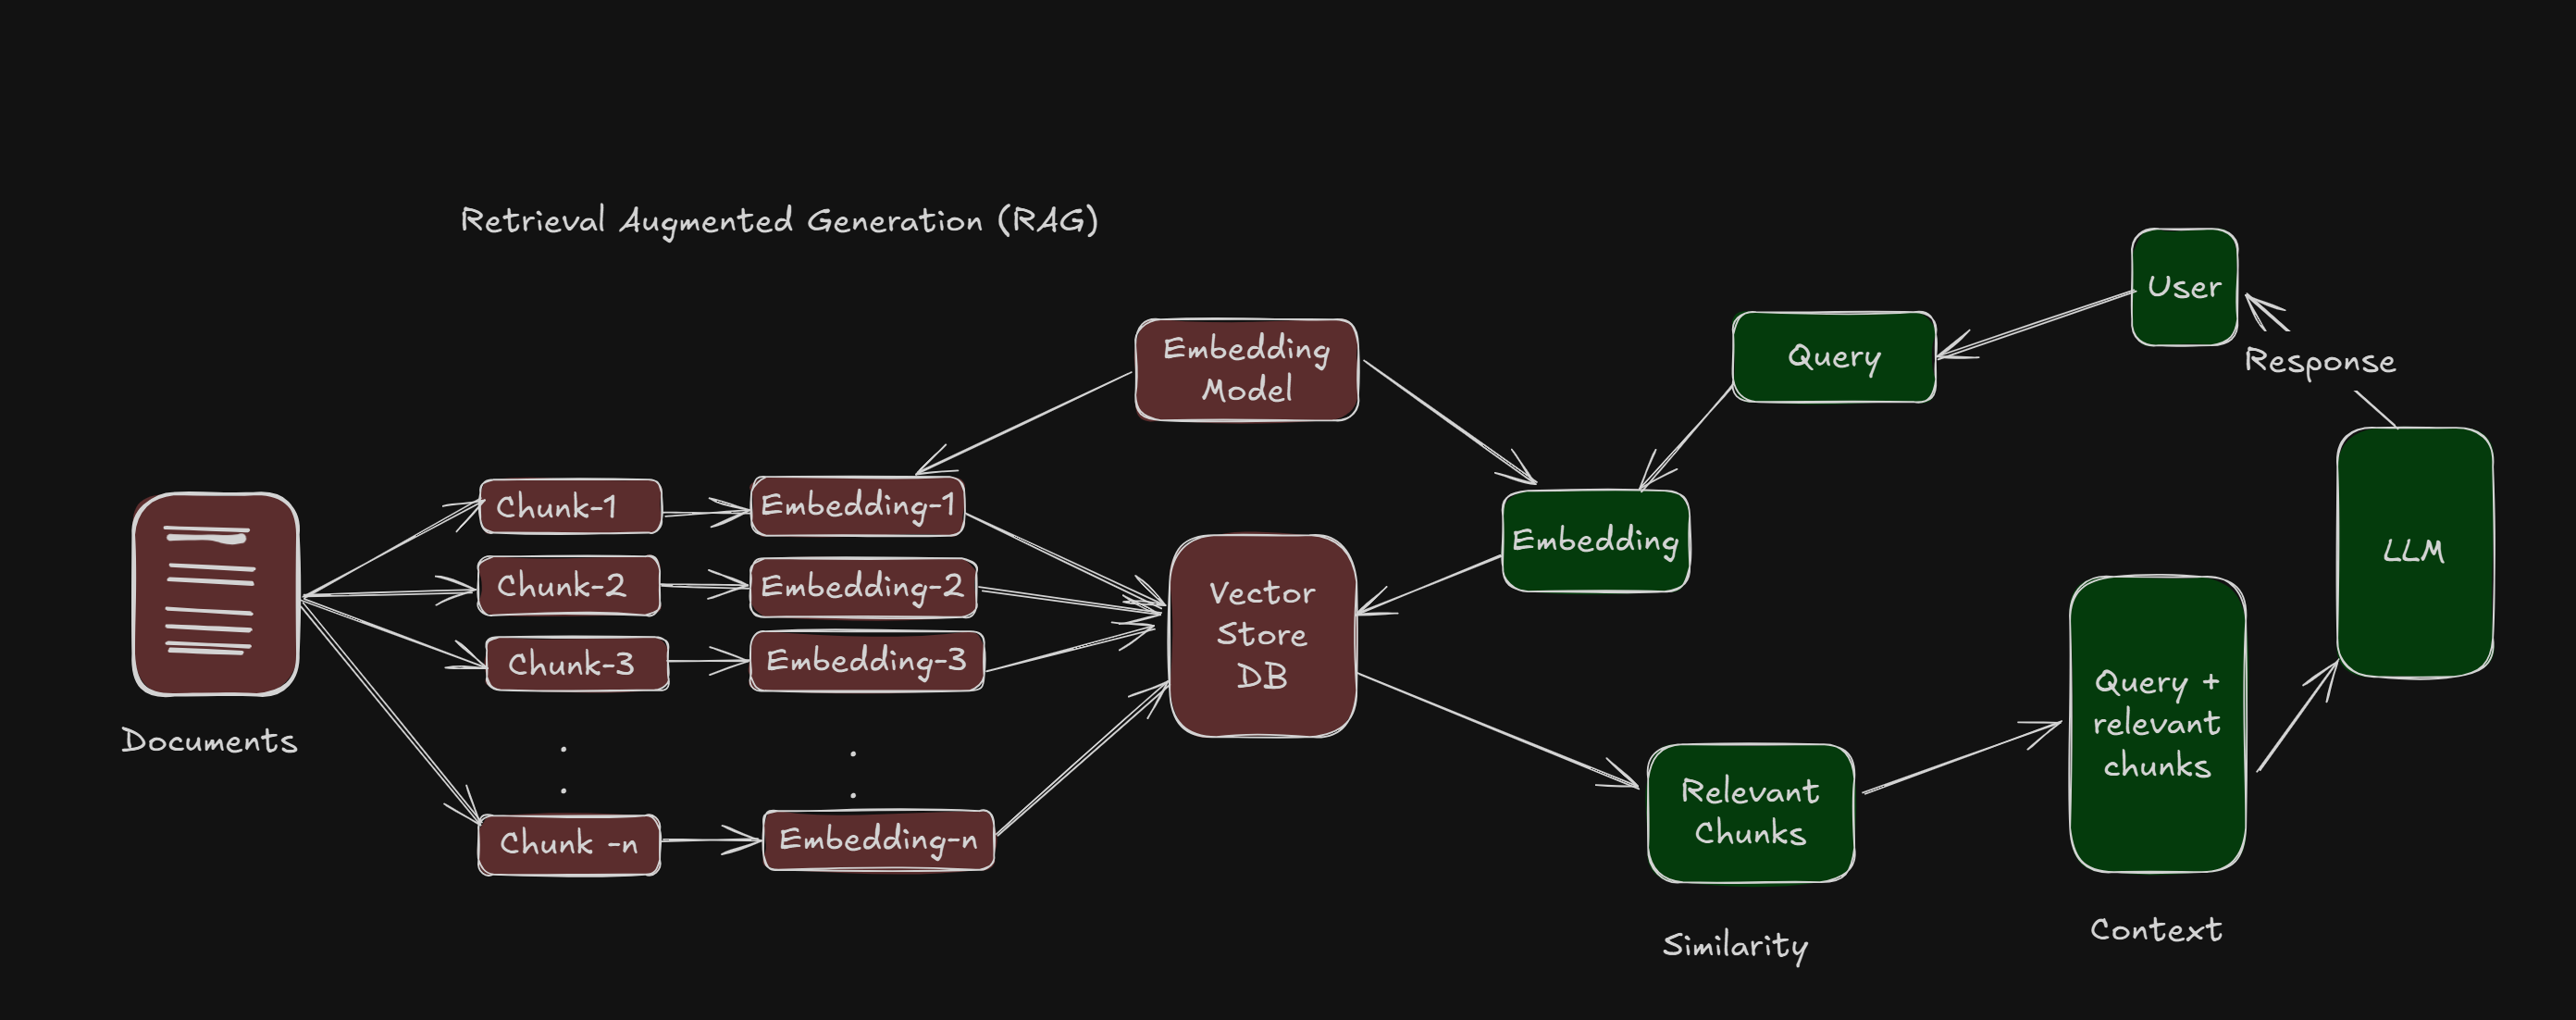

In [ ]:
!pip install langchain langchain-community chromadb pypdf pymupdf sentence-transformers --quiet

In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader

file_path = "pdf1.pdf"
loader = PyMuPDFLoader(file_path)

pages = loader.load()

print(pages[0].page_content)

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 200,
    chunk_overlap=50
)

docs = text_splitter.split_documents(pages)
print(docs[0].page_content)

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings

embedding_model = HuggingFaceEmbeddings(
    model_name = "sentence-transformers/all-MiniLM-L6-v2"
)

sample_text = docs[0].page_content
embedding_vector = embedding_model.embed_query(sample_text)

print(len(embedding_vector))
print(embedding_vector[:5])

In [ ]:
from langchain_community.vectorstores import Chroma

vectorstore = Chroma.from_documents(
    documents = docs,
    embedding = embedding_model,
    persist_directory = "chroma_db"


)

vectorstore.persist()


In [ ]:
retriever = vectorstore.as_retriever()

query = "What are class a stocks?"
results = retriever.get_relevant_documents(query)
print(results[0].page_content)